# Pytorch - Yolo - Object Detection
Bu projede uyuyan ve uyanık insanları tespit eden araç geliştiriyoruz.
<br><br>Bu projenin geliştirilmesinde <a href="https://www.youtube.com/watch?v=tFNJGim3FXw" target=_blank>bu videodan</a> faydalanılmıştır.
<br><br><img src="https://previews.123rf.com/images/djvstock/djvstock1505/djvstock150501342/40257626-turuncu-arka-plan-vekt%C3%B6r-%C3%A7izim-%C3%BCzerinde-uyku-tasar%C4%B1m%C4%B1.jpg"
width=300>

## Kurulum ve Gerekli Kütüphaneleri Ekleme
1. Anacondada yeni bir environment oluşturma (isteğe bağlı)
2. Pytorch kurulumu
    * Kurulum için <a href="https://pytorch.org/get-started/locally/" target=_blank><u>bu adrese</u></a> bakınız.
3. Yolo Kurulumu
    * Kurulum için <a href="https://github.com/ultralytics/ultralytics" target=_blank><u>bu adrese</u></a> bakınız.

In [1]:
# Pytorch Kurulum (Stable 2.2.2, Windows, Pip, Python, Cuda 11.8)
# pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [2]:
# Yolo v8 Kurulum
# pip install ultralytics

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from ultralytics import YOLO

## Modeli Yükleme

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
#model = YOLO("yolov8n.yaml") 

Using cache found in C:\Users\Abdullatif/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-4-16 Python-3.11.8 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Resim Tanıma

In [4]:
img = 'https://ultralytics.com/images/zidane.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 4945.6ms pre-process, 110.5ms inference, 276.2ms NMS per image at shape (1, 3, 384, 640)


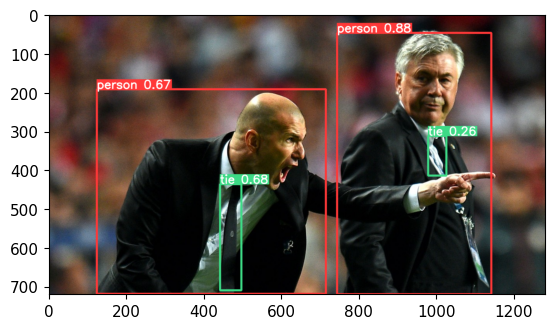

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
# Resimdeki çerçevelerin x,y koordinatları
results.xyxy

[tensor([[7.43291e+02, 4.83436e+01, 1.14176e+03, 7.20000e+02, 8.79861e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66693e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]], device='cuda:0')]

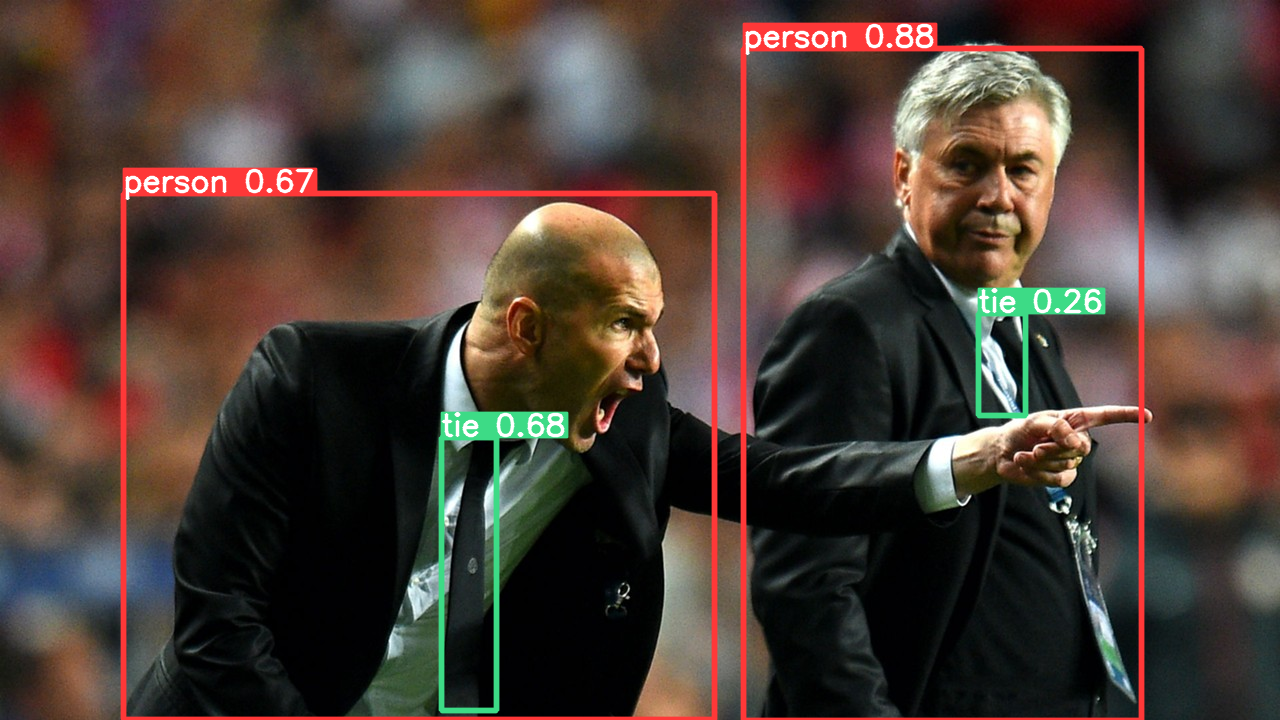

In [8]:
# Resmi göstermek için
results.show()

In [9]:
# Resmin piksel değerleri
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [10]:
# Resmin dizi ölçüleri
np.array(results.render()).shape

(1, 720, 1280, 3)

In [11]:
cars = "cars.jpeg"
r = model(cars)
r.print()

image 1/1: 846x1113 1 person, 12 cars, 4 trucks
Speed: 23.3ms pre-process, 82.6ms inference, 47.9ms NMS per image at shape (1, 3, 512, 640)


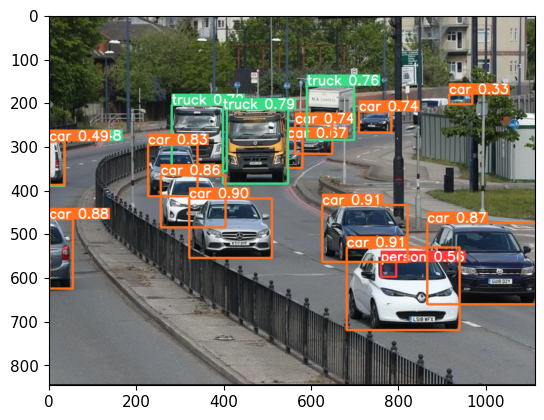

In [12]:
plt.imshow(np.squeeze(r.render()))
plt.show()

## Gerçek Zamanlı Nesne Tanıma

In [27]:
# cap = cv2.VideoCapture(0) # Webcam
cap = cv2.VideoCapture("cars.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    # Nesne tanıma
    results = model(frame)
    # İşaretlenen nesneleri göster
    cv2.imshow("YOLO", np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

## Yeni Nesne Eğitimi

In [19]:
import uuid
import os
import time

In [24]:
images_path = os.path.join("data", "images") # /data/images
labels = ["awake", "drowsy"]
number_imgs = 20

In [62]:
i=0
cap = cv2.VideoCapture(0) # Webcam
while cap.isOpened():
    # Webcam resim alma
    ret, frame = cap.read()
    # Resmi ekranda gösterme
    cv2.imshow("Resim kaydetme", frame)
    if cv2.waitKey(1) ==13:
        fname=labels[int(np.floor(i/20))]
        print("{} için Resimler alınıyor, resim numarası: {}".format(fname, i))
        # Resme özel bir isim verme
        imgname = os.path.join(images_path, fname+"."+str(uuid.uuid1())+".jpg")
        # Resmi ilgili klasöre kaydetme
        cv2.imwrite(imgname, frame)
        i+=1
        if i==40:
            break
cap.release()
cv2.destroyAllWindows()

awake için Resimler alınıyor, resim numarası: 0
awake
awake için Resimler alınıyor, resim numarası: 1
awake
awake için Resimler alınıyor, resim numarası: 2
awake
awake için Resimler alınıyor, resim numarası: 3
awake
awake için Resimler alınıyor, resim numarası: 4
awake
awake için Resimler alınıyor, resim numarası: 5
awake
awake için Resimler alınıyor, resim numarası: 6
awake
awake için Resimler alınıyor, resim numarası: 7
awake
awake için Resimler alınıyor, resim numarası: 8
awake
awake için Resimler alınıyor, resim numarası: 9
awake
awake için Resimler alınıyor, resim numarası: 10
awake
awake için Resimler alınıyor, resim numarası: 11
awake
awake için Resimler alınıyor, resim numarası: 12
awake
awake için Resimler alınıyor, resim numarası: 13
awake
awake için Resimler alınıyor, resim numarası: 14
awake
awake için Resimler alınıyor, resim numarası: 15
awake
awake için Resimler alınıyor, resim numarası: 16
awake
awake için Resimler alınıyor, resim numarası: 17
awake
awake için Resimler 

In [63]:
print(os.path.join(images_path, fname+"."+str(uuid.uuid1())+".jpg"))

data\images\drowsy.cd817ce3-fcdf-11ee-a8c0-ec2e988b164c.jpg


In [64]:
!git clone https://github.com/HumanSignal/labelImg

Cloning into 'labelImg'...


In [1]:
#!pip install pyqt5 lxml --upgrade
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [2]:
#!git clone https://github.com/ultralytics/yolov5

In [3]:
#!cd yolov5 & pip install -r requirements.txt

### Modelin Eğitilmesi

In [6]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt
# Eğitimden sonra uzun çıktı listesi için kod kapatılmıştır.

## Model Yükleme

In [83]:
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/runs/train/exp3/weights/last.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Abdullatif/.cache\torch\hub\master.zip
YOLOv5  2024-4-17 Python-3.11.8 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [90]:
img = os.path.join("data", "images", "awake.139c2e1b-fcdf-11ee-87c5-ec2e988b164c.jpg")
results = model(img)
results.print()

image 1/1: 480x640 1 awake, 1 drowsy
Speed: 9.0ms pre-process, 8.8ms inference, 112.9ms NMS per image at shape (1, 3, 480, 640)


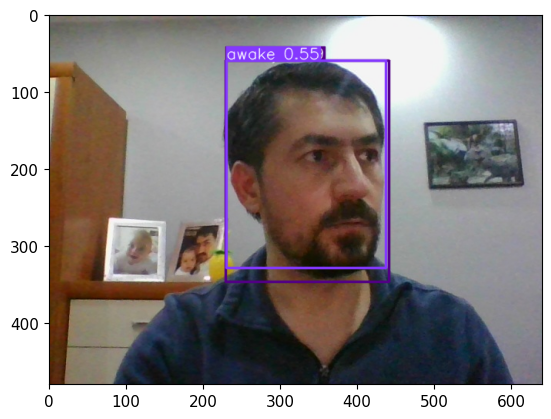

In [91]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [92]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow("YOLO", np.squeeze(results.render()))
    if cv2.waitKey(10) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()

## Sonuç: 
Bu projede YOLO eğitilmiş modelleri kullanarak uyuyan veya uyanık insanı ayırt eden sınıflandırma modeli geliştirdik. 
YOLO kütüphanesinin son sürümü V9 olarak yayımlandı. Ancak kararlı sürüm olarak v8 kurulmuştur. Bu projede kullanılan yöntem için AutoShape modeline ihtiyaç vardır. Bu yğzde YOLO v5 modeli ayrıca indirilmiştir. YOLO kütüphanesi hali hazırda nesne tanıma özelliğine sahiptir. Ancak yeni etiket kullanarak model eğitmeye de izin vermektedir. Bunun için ihtiyaç duyulan uyanık ve uyuyan insan fotoğrafları çekerek ilk önce etiketleme sonra da model eğitimi yapılmaktadır. Etiketleme için YOLO klasörü altında bulunan labelImg.py programı kullanılarak kolayca yapılabilmektedir.